# MA124 Maths by Computer: Assignment 1

Student number: 2003869

---


In [1]:
# Import standard libraries

import numpy as np
import matplotlib.pyplot as plt

---

## A. Perspective view of Euclid's orchard


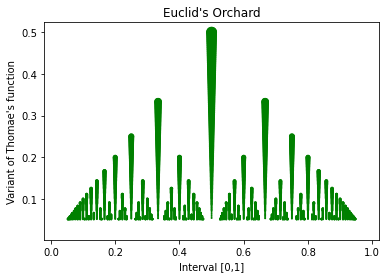

In [2]:
# Python code to compute and plot Euclid's orchard 
# Please note I've used the scatter method rather than plot, as I didn't read the hints below straight away 
#...and in the end I didn't have enough time to start from scratch and correct my mistakes.


cutOff = 39
interval = np.arange(2,cutOff)
y = []
x=[]

#Following for loop is big Oh (n^3) time so takes a while to load
for i in interval:
    denominator = i
    for w in range(1,int(denominator)):
        if (w/i) in x: #This step here ensures that if w and i aren't coprime, they are discounted 
            continue
        x.append(w/i)
        y.append(1/i)
        #This nested loop here will add extra values to x and y to form lines on the graph
        for a in np.linspace((1/i),(1/cutOff), 100):  
            x.append(w/i)
            y.append(a)

#This ensures that the marker size varies as to add depth to the graph
markerSize = [np.floor(10*cutOff*(n**2)) for n in y]

plt.scatter(x,y, s=markerSize, c = 'green') 
plt.title("Euclid's Orchard")
plt.xlabel("Interval [0,1]")
plt.ylabel("Variant of Thomae's function")
plt.show()

Please click on the following link to see more info on `Euclids Orchard`
> [Euclid's Orchard - Wikipedia](https://en.wikipedia.org/wiki/Euclid%27s_orchard)

---

## B. Taylor series approximations to sin(x) and cos(x)


One can approximate $\sin(x)$ using the first $N+1$ terms of a Taylor series:
$$
\sin(x) \simeq \sum_{k=0}^N \frac{(-1)^k}{(2k+1)!} x^{2k+1}
$$

Similarly, one can approximate $\cos(x)$ using the first $N+1$ terms of a Taylor series:

$$
\cos(x) \simeq \sum_{k=0}^N \frac{(-1)^k}{(2k)!} x^{2k}
$$

The code below will go onto define two new functions `sinTaylor` and `cosTaylor` that use the definitions above to approximate _sine_ and _cosine_ for different values of x in a given array.

It will then go onto plot `sine` and `cosine` against they approximate counterparts for varying values of `N`.

In [3]:
#sine(Aproximate) map function for an array using defintion of taylor series
def sinTaylor(x, N):
    resultArray = np.zeros(len(x)) #sets a default array of zeros to start with
    for a,i in zip(x, range(len(x))): #a will iterate through elements in x, i will stand for its index
        result = 0
        for k in range(N):
            result += ((-1)**k) * (a**((2*k)+1)) / np.math.factorial((2*k)+1)
        resultArray[i] = result
    return resultArray

In [4]:
#cosine(Aproximate) map function for an array using defintion of taylor series
def cosTaylor(x, N):
    resultArray = np.zeros(len(x)) #sets a default array of zeros to start with
    for a,i in zip(x, range(len(x))): #a will iterate through elements in x, i will stand for its index
        result = 0
        for k in range(N):
            result += ((-1)**k) * (a**(2*k)) / np.math.factorial(2*k)
        resultArray[i] = result
    return resultArray

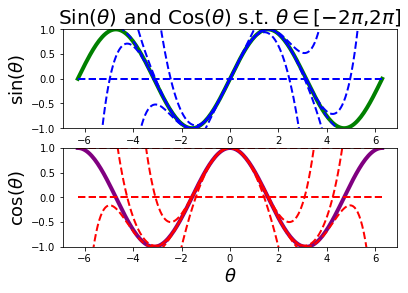

In [5]:
#A plot of sine and cosine against they approximate counterparts for varying values of N
theta = np.linspace(-2*(np.pi),2*(np.pi), 200)

sinTrue = np.sin(theta)
cosTrue = np.cos(theta)

#Plotting the graph of sin
plt.subplot(211)
plt.plot(theta, sinTrue,'-g', lw=4)

#Plotting sinTaylor for different values of N (from 0 to 6)
for i in range(7):
    plt.plot(theta, sinTaylor(theta,i),'--b', lw=2)

plt.ylim(-1, 1)
plt.title(r'Sin($\theta$) and Cos($\theta$) s.t. $\theta \in$[$-2\pi$,$2\pi$]', fontsize=20)
plt.ylabel(r'sin($\theta$)', fontsize=18)

#Plotting the graph of cosine
plt.subplot(212)
plt.plot(theta, cosTrue, color = 'purple', lw=4)

#Plotting cosTaylor for different values of N (from 0 to 6)
for i in range(7):
    plt.plot(theta, cosTaylor(theta,i),'--r', lw=2)

plt.ylim(-1, 1)
plt.xlabel(r'$\theta$', fontsize=18)
plt.ylabel(r'cos($\theta$)', fontsize=18)

plt.show()

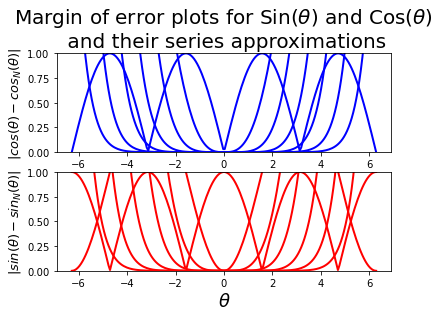

In [6]:
#Plotting the graph of error margins between sin(theta) and sinTaylor(theta, N) 
#for N in the interval [0,6]
plt.subplot(211)
plt.title(r'Margin of error plots for Sin($\theta$) and Cos($\theta$)'
          '\n'' and their series approximations', fontsize=20)
for i in range(7):
    errorFuncSin = np.abs(np.sin(theta) - sinTaylor(theta,i))
    plt.plot(theta, errorFuncSin,'-b', lw=2)
plt.ylim(0, 1)
plt.ylabel(r'$|cos(\theta) - cos_N(\theta)|$', fontsize=13)

#Plotting the graph of error margins between cos(theta) and cosTaylor(theta, N) 
#for N in the interval [0,6]
plt.subplot(212)
for i in range(7):
    errorFuncCos = np.abs(np.cos(theta) - cosTaylor(theta,i))
    plt.plot(theta, errorFuncCos,'-r', lw=2)
plt.ylim(0, 1)
plt.ylabel(r'$|sin(\theta) - sin_N(\theta)|$', fontsize=13)
plt.xlabel(r'$\theta$', fontsize=18)

plt.show()

- Above we have two graphs that show $sin(\theta)$ and $cos(\theta)$ with the `solid` <font color='green'>**green**</font> and <font color='purple'>**purple**</font> lines respectively.
- Plotted on the same graphs, you can see the taylor approximations for $sin(\theta)$ and $cos(\theta)$ for varying values of **N** (from 0 to 6) in the `dotted` <font color='blue'>**blue**</font> and <font color='red'>**red**</font> lines respectively.
>Please note how for greater values of **N**, the closer to the true value of $sin(\theta)$ or $cos(\theta)$ the taylor approximation $sin(\theta)$ and $cos(\theta)$ it will be. _(i.e. it will be closer to the true function for a greater interval of $\theta$)_

- Below these two graphs we also have the error margins or difference in value for the functions $sin(\theta)$ and $cos(\theta)$ and the series aproximations $sin_N(\theta)$ and $cos_N(\theta)$ respectively for varying values of **N** _(from 0 to 6)_. 
> Notice how for greater values of **N**, as noted already above, the error margins between the true and approximate functions of either $cos(\theta)$ or $sin(\theta)$ are closer to 0 for a greater interval of $\theta$.


---
## C. Parametric roller coaster

Here is an original design for a parametric roller coaster. 
The definitions below describe the nature of each individual section of the rollercoaster graph shown below.

<font color='blue'>**Section 1**</font> for $t\in[0,4\pi]$
- $x_1(t) = t$
- $y_1(t) = t + 2\pi $
- $z_1(t) = t(sin(t))$

<font color='orange'>**Section 2**</font> for $t\in[0,6\pi]$
- $x_2(t) = -2\pi cos(t) + 6\pi$
- $y_2(t) = t$
- $z_2(t) = -2\pi sin(t)$

<font color='green'>**Section 3**</font> for $t\in[0,(14\pi )^\frac{2}{3}]$
- $x_3(t) = t$
- $y_3(t) = tsin(t^\frac{3}{2} )$
- $z_3(t) = tcos(t^\frac{3}{2} ) - 4\pi$

<font color='red'>**Section 4**</font> for $t\in[0,4\pi]$
- $x_4(t) = 0$
- $y_4(t) = \frac{t^2}{16}  - \pi ^2$
- $z_4(t) = -t $

<font color='purple'>**Section 5**</font> for $t\in[0,\pi]$
- $x_5(t) = 0$
- $y_5(t) = \frac{(\pi ^2 + 2\pi )cos(t)}{2}  - \frac{\pi ^2 - 2\pi }{2}$
- $z_5(t) = \frac{(\pi ^2 + 2\pi )sin(t)}{2} $

---

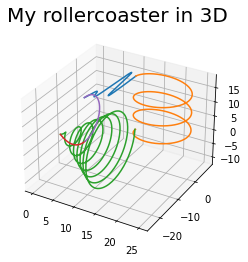

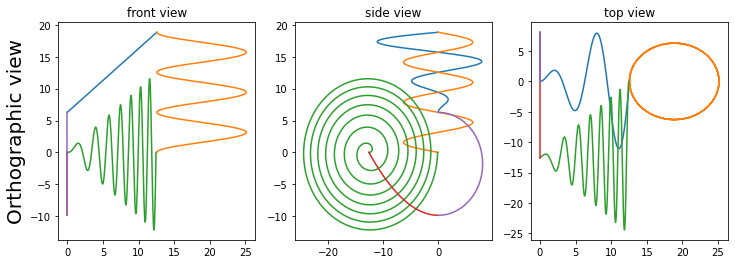

In [7]:
#Parameterised graph to model a "fun" rollercoaster
#x,y, and z will be parameterised by t
# ti will represent the values that t will take for the ith section of the rollercoaster
t1and4 = np.linspace(0,4*(np.pi), 1000)
t2 = np.linspace(0,6*(np.pi), 1250)
t3 = np.linspace(0,(14*(np.pi))**(2/3),1000)
t5 = np.linspace(0,np.pi, 250)

#1st section
x1 = t1and4
y1 = t1and4 + (2*(np.pi))
z1 = t1and4*(np.sin(t1and4))

#2nd section
x2 = ((-2)*(np.pi)*(np.cos(t2))) + (6*(np.pi))
y2 = t2
z2 = (-2)*(np.pi)*(np.sin(t2))

#3rd section
x3 = t3
y3 = t3 * (np.sin(t3**1.5))
z3 = t3 * (np.cos(t3**1.5)) - (4*(np.pi))

#4th section
x4 = np.zeros(1000)
y4 = ((1/16)*(t1and4**2)) - ((np.pi)**2)
z4 = (-1) * t1and4

#5th section
x5 = np.zeros(250)
y5 = (np.cos(t5)*(1/2)*(((np.pi)**2)+(2*(np.pi)))) - ((1/2)*(((np.pi)**2)-(2*(np.pi))))
z5 = (np.sin(t5)*(1/2)*(((np.pi)**2)+(2*(np.pi)))) 

ax = plt.axes(projection='3d')
ax.plot3D(x1,z1,y1)
ax.plot3D(x2,z2,y2)
ax.plot3D(x3,z3,y3)
ax.plot3D(x4,z4,y4)
ax.plot3D(x5,z5,y5)
plt.title('My rollercoaster in 3D',fontsize=20)

plt.show()

fig = plt.figure(figsize=(12,4))
front = fig.add_subplot(131)
plt.title('front view')
plt.ylabel('Orthographic view', fontsize=20)
front.plot(x1,y1)
front.plot(x2,y2)
front.plot(x3,y3)
front.plot(x4,y4)
front.plot(x5,y5)

side = fig.add_subplot(132)
plt.title('side view')
side.plot(z1, y1)
side.plot(z2,y2)
side.plot(z3,y3)
side.plot(z4,y4)
side.plot(z5,y5)

top = fig.add_subplot(133)
plt.title('top view')
top.plot(x1,z1)
top.plot(x2,z2)
top.plot(x3,z3)
top.plot(x4,z4)
top.plot(x5,z5)

plt.show()

> <font color='blue'>**Section 1**</font> starts slalom-ing upwards, following a sin natured path up at a steady slope of one. Till it reaches <br>
<font color='orange'>**Section 2**</font> This is where the rider swirls uncontrolably downwards in a helix spiral with a radius of $2\pi $ untill they reach <br>
<font color='green'>**Section 3**</font> This is where if the rider hadn't already felt dizzy yet, they would soon become so. This helix-with-a-twist's shape is largely determined by the function $tsin(t^\frac{3}{2} )$, whereby its max height tends to $0$ as the rider approaches their starting point.<br>
<font color='red'>**Section 4**</font> has the nature of a polynomial degree 2, whereby the rider builds up speed again as they decline down a to depth of $\pi ^2$ to be able to get round<br>
<font color='purple'>**Section 5**</font> This semi circle of diameter $\pi ^2 + 2\pi$ takes the momentum gathered up until this point to return back to their starting point again _(located at $(0,2\pi ,0)$ on the graphs above)_